
# VISUALIZAÇÃO DE DADOS
---
As visualizações de dados geralmente servem a um de dois objetivos: apresentar ou explorar dados. Aqui, eu confio no primeiro e uso uma combinação do pacote Matplotlib e Seaborn do python para fazer isso.




# O Desafio
---
Você decidiu abrir um pequeno café controlado por robôs no Brasil. O projeto é promissor, mas caro, então você e seus parceiros decidem tentar atrair investidores. Eles estão interessados ​​nas condições atuais do mercado - você será capaz de manter seu sucesso quando a novidade dos garçons robôs passar?
Tire uma conclusão geral e forneça recomendações sobre o tipo de restaurante e o número de assentos. Faça uma apresentação de sua pesquisa para compartilhar com os investidores - o público-alvo .

# descrição de dados
Para esse projeto, utilizei Dados de código aberto sobre restaurantes em Los Angeles, onde existem projetos semelhantes a esse. O conjunto de dados está denominado como rest_data_us.csv, e tem como atributos:

* object_name - nome do estabelecimento
* cadeia - estabelecimento de cadeia (TRUE / FALSE)
* object_type - tipo de estabelecimento
* endereço - endereço
* número - número de assento

#Resumo da pesquisa de mercado do estabelecimento de LA:
---
#Estabelecimentos de LA:

* Contagem total de restaurantes: 9.651
* 62% não são franquias e 38% são.
* Estabelecimentos da rede - número de assentos em duas categorias:
  1. Poucos assentos (< 50) 
  2. e muitos assentos (> 61)

#Cafeteria:

* Aproximadamente 4,5% da participação de mercado
* É mais provável que seja uma rede (61,1%)
  1. De acordo com pesquisas de mercado, essa tendência deve continuar aumentando
* Estabelecimentos de rede menor parcela de muitos assentos (> 61) em relação a outro tipo de estabelecimento
  1. os caracteriza como pequenos locais
  2. Número médio de assentos = 25

# Restaurante:

* Grande parcela de estabelecimentos em LA : os restaurantes representam cerca de 75% dos estabelecimentos em LA - tornam-se relativamente mais fáceis de competir e prosperar devido ao serviço que irão fornecer
* Mais propensos a serem não correntes (68,4%)
* Correntes :
    1. 1/5 ou 20% têm muitos assentos (> 60)
    2. Têm em média 48 lugares
    3. 68% das ruas contêm 1 restaurante, enquanto 32% contêm mais de 1; As 10 principais ruas contêm entre 110 e 230 restaurantes.
* Ruas com mais de 10 restaurantes
    1. Ter uma média de 32 assentos
    2. A distribuição dos assentos pode ser dividida em dois grupos e não difere entre os estabelecimentos de rede e não rede.

#Conclusão

* Restaurantes com maior probabilidade de serem não franquias (68,4%)

* Grande parcela de estabelecimentos em LA : os restaurantes representam cerca de 75% dos estabelecimentos em LA - tornam-se relativamente mais fáceis de competir e prosperar devido ao serviço que irão fornecer

Ao pensar em se estabelecer em LA, dados: (1) estabelecimento escolhido (pequeno Café), (2) a novidade do serviço prestado (garçons robô), (3) as atuais condições de mercado, (4) custo do projeto, e (5) objetivo de longo prazo para manter um estabelecimento de sucesso, a seguinte conclusão é dada:

*A empresa deve pivotar no sentido de estabelecer um restaurante, pois há menos grandes players nesse mercado em relação aos cafés; pequenos cafés estão sendo superados por franquias de cafés. Além disso, a empresa deve considerar começar como uma não rede com 48 e (média para uma rede de restaurantes) e dependendo de sua estratégia, estabelecer-se em uma rua com muitos restaurantes e / ou um restaurante. Ela pode então crescer agressivamente e estabelecer uma rede a partir de então, dada a novidade do serviço prestado.*



In [1]:
from matplotlib import ticker
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import PercentFormatter
import matplotlib.patches as mpatches
plt.style.use('fivethirtyeight')

# Explorando os dados gerais

In [3]:
dataset = 'rest_data_us.csv'
df = pd.read_csv(dataset)
df.sample(3)

,id,object_name,address,chain,object_type,number
4554,16340,WINCHELL'S DONUTS #9384,2501 S SAN PEDRO ST,False,Fast Food,5
567,12353,WESTCHESTER SENIOR CITIZEN C,8740 LINCOLN BLVD,False,Restaurant,64
8137,19923,POPEYES CHICKEN,8530 S FIGUEROA ST,True,Restaurant,46


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


Valores nulos presentes na coluna "chain". Vamos dar uma olhada rápida nisso.

In [5]:
print(df[df['chain'].isnull()])
print(df['chain'].unique())

         id              object_name  ... object_type number
7408  19194  TAQUERIA LOS 3 CARNALES  ...  Restaurant     14
7523  19309     JAMMIN JIMMY'S PIZZA  ...       Pizza      1
8648  20434    THE LEXINGTON THEATER  ...  Restaurant     35

[3 rows x 6 columns]
[False True nan]


Apenas três valores foram identificados como nulos; valores binários presentes para a coluna. Iremos rapidamente imputar usando o modo dado o tamanho e os valores binários.

In [6]:
df['chain'].fillna(df['chain'].mode, inplace=True)
print(df['chain'].isnull().sum())

0


**NOTA: surgiu um problema ao aplicar o método de contagem de valores que consegui identificar como sendo devido à coluna.**

In [8]:
#Para corrigir isso, transformaremos a coluna em um valor booleano.
for i in df.columns:
    try:
        df[i].value_counts()
    except:
        print('ERRO', i)

df['chain'] = df['chain'].apply(lambda x: bool(x))
df['chain'].dtypes

dtype('bool')

Agora vamos verificar os valores de cada coluna para outros valores nulos comumente representados:

[0, '', valores negativos, n / a ',' na ',' an ',' n \ a ','? ',' N / A ','? ',' Na ',' Na ', 'N / D']

In [9]:
def missing_values(data):
    miss = {}
    if len(data.columns) <= 0:
        print('Algo deu errado. Nenhuma coluna detectada.')
    for i in data.columns:  # iterar por todas as colunas no conjunto de dados para pesquisar cada valor ausente definido
        if len(data[data[i] == 0]) > 1:
            miss[i] = 'Zero values ' + str(
                round(len(data[data[i] == 0]) / len(data) * 100, 2))
        try:
            if len(np.where(data[i] == '')) > 1:
                miss[i] = 'Empty strings ' + str(
                    round(len(data[data[i] == '']) / len(data) * 100, 2))
        except:
            pass
        if np.issubdtype(data[i].dtype,
                         np.number) and len(data[data[i] < 0]) > 1:
            miss[i] = 'Negative values ' + str(
                round(len(data[data[i] < 0]) / len(data) * 100, 2))
        try:
            if len(data[data[i].str.lower.isin(['n/a', 'na', 'an', 'n\a', '?'
                                                ])]) > 1:
                miss[i] = 'other null values present'
        except:
            if len(data[data[i].isin(['N/A', '?', 'na', 'Na', 'N/a'])]) > 1:
                miss[i] = 'other null values present'
    return sorted(miss.items(),
                  key=lambda x: float(miss[x[0]].split(' ')[-1]),
                  reverse=True)

In [10]:
missing_values(df)
# tudo ok aqui

[('chain', 'Zero values 61.88')]

Chain é uma variável booleana, portanto, é seguro afirmar que os valores nulos foram considerados. Por último, verificaremos se há valores duplicados ou linhas duplicadas neste caso.

In [11]:
df[df.duplicated()]

,id,object_name,address,chain,object_type,number


# Análise de dados

---


Começaremos investigando as proporções dos vários tipos de estabelecimentos.

In [12]:
# estabelecimento e sua contagem total - normalizado
establishment_proportion = df['object_type'].value_counts(normalize=True)
establishment_proportion

Restaurant    0.751736
Fast Food     0.110455
Cafe          0.045073
Pizza         0.033157
Bar           0.030256
Bakery        0.029323
Name: object_type, dtype: float64

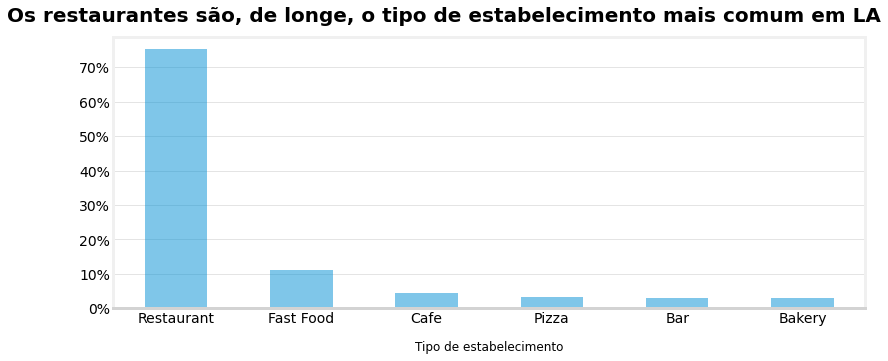

In [13]:
#plot
fig,ax =plt.subplots(facecolor='white')
establishment_proportion.plot(kind='bar',
                                   figsize=(12, 5),
                                   rot=0,
                                   alpha=.5)
ax.set_facecolor("white")

#Marcações
ax.tick_params(labelsize=14)
ax.tick_params(axis='both', left=False, bottom=False)
ax.yaxis.set_major_formatter(PercentFormatter(1))

#grades do gráfico
plt.grid(False, axis='x')
plt.grid(axis='y', linewidth=.5, zorder=2)
ax.spines['bottom'].set_color('lightgray')
ax.spines['bottom'].set_color('lightgray')

#rótulos
plt.ylabel('',labelpad=15)
plt.xlabel('Tipo de estabelecimento',labelpad=15)
plt.title("Os restaurantes são, de longe, o tipo de estabelecimento mais comum em LA",
          fontweight='semibold' ,
          fontsize=20,
          x=.44,
          pad=15)

plt.show()

Aproximadamente 3/4 dos estabelecimentos em LA são restaurantes, sendo o fast food o próximo tipo de estabelecimento mais comum (~ 10%). Por outro lado, o Café, local planejado da empresa, representa 5% dos estabelecimentos em LA.

In [14]:
df['object_type'].value_counts()

Restaurant    7255
Fast Food     1066
Cafe           435
Pizza          320
Bar            292
Bakery         283
Name: object_type, dtype: int64

Ao olhar para os números da contagem, vemos que 7.255 dos estabelecimentos em LA são do tipo restaurante. Em comparação, Cafés vêm com uma contagem baixa de 435. Para construir sobre isso, seria bom olhar através da proporção de estabelecimentos não vinculados a redes.

In [15]:
df['chain'].value_counts(normalize=True)

False    0.618796
True     0.381204
Name: chain, dtype: float64

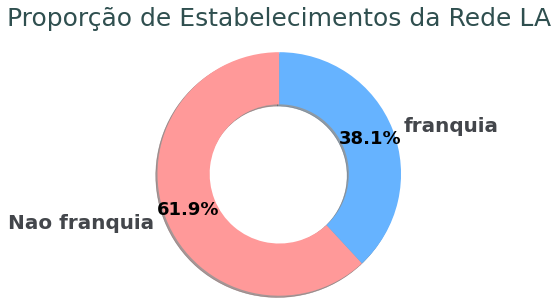

In [21]:
proportion_chain = df['chain'].value_counts(normalize=True) * 100
fig, ax = plt.subplots(facecolor='white')

patches, texts, autotexts = plt.pie(proportion_chain,
                                    labels=['Nao franquia', 'franquia'],
                                    labeldistance=1.1,
                                    shadow=True,
                                    colors=['#ff9999', '#66b3ff'],
                                    autopct='%1.1f%%',
                                    textprops={
                                        'fontsize': 18,
                                        'fontweight': 'bold'
                                    },wedgeprops=dict(width=0.6),
                                     startangle=90,
                                    pctdistance=0.80,
                                    radius=1.4)

texts[0].set_fontsize(20)
texts[1].set_fontsize(20)
for text in texts:
    text.set_color('#43464b')
    
plt.title("Proporção de Estabelecimentos da Rede LA",
          pad=40,
          size=25,
          x=.5,
          color='darkslategray',
          fontname='sans-serif')

plt.show()

Os estabelecimentos sem franquia estão a 5% de distância de representar 2/3 dos estabelecimentos da LA. Conhecendo a participação dos restaurantes de Los Angeles, será interessante ver que tipo de estabelecimento costuma ser uma FRANQUIA.

Dados os valores bool, usaremos pivot_table () e agrupar por estabelecimento para recuperar o valor médio da cadeia (entre 0 e 1).

In [22]:
establishment_chain_proportion = df.pivot_table(index='object_type',
                                                values='chain').sort_values(
                                                    'chain', ascending=False)
establishment_chain_proportion

,chain
object_type,
Bakery,1.000000
Cafe,0.611494
Fast Food,0.567542
Pizza,0.481250
Restaurant,0.316196
Bar,0.263699


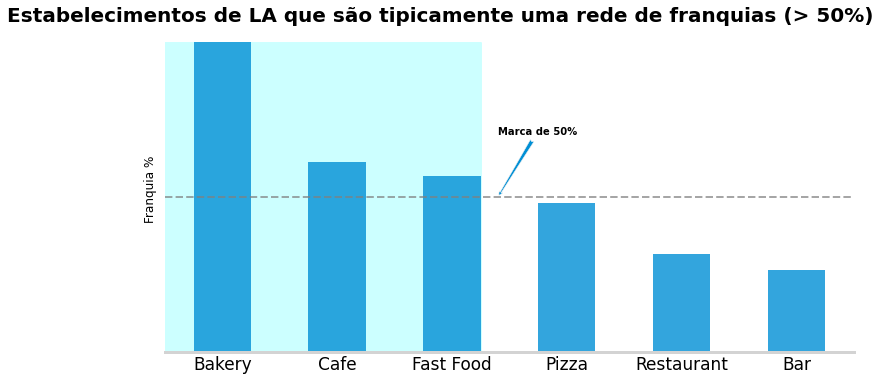

In [23]:
#plot
fig, ax = plt.subplots(figsize=(11, 6), facecolor='white')
ax.set_facecolor("xkcd:white")
establishment_chain_proportion.plot(kind='bar',
                                    rot=0,
                                    ax=ax,
                                    alpha=.8,
                                    legend=False)
plt.axhline(.5, xmin=0, linewidth=2, linestyle='--', alpha=.7, color='gray')

#shading
plt.fill_between(
    (-.8, 2.25), 1, 0,
    color='cyan',  # cor para marcação
    alpha=0.2)

#tick 
ax.tick_params(axis='x', labelsize=17)
ax.yaxis.set_major_formatter(PercentFormatter(1))

plt.annotate("Marca de 50%",
             xy=(2.4, .5),
             xytext=(2.4, .7),
             color='black',fontweight='bold',
             arrowprops=dict(arrowstyle="fancy"))
#spines
sns.despine()
ax.spines['bottom'].set_color('lightgray')
ax.spines['left'].set_visible(False)
plt.grid(False, axis='both')

#labels
ax.set_yticklabels('')
plt.xlabel("")
plt.ylabel('Franquia %')
plt.title("Estabelecimentos de LA que são tipicamente uma rede de franquias (> 50%)",
          fontsize=20,
          x=.40,
          pad=0,
          fontweight='semibold')

plt.show()

Curiosamente, os restaurantes têm menos probabilidade de ser uma rede de franquias; esta é provavelmente a razão pela qual as não franquias foram bem representadas no gráfico de pizza anteriormente. Devem ser considerados especialmente o tipo de estabelecimento da empresa, Cafes, e sua probabilidade de ser uma rede de franquia em vez de uma não-rede.

Pensando no longo prazo, dados os números acima mencionados, a empresa se sairá bem se quiser crescer agressivamente em sua fase inicial como Café para: 
1. diferenciar-se de outros Cafés e então se tornar um estabelecimento de rede. 
2. Outra opção mais atraente é abrir um restaurante.

Vamos explorar os estabelecimentos da rede para obter mais informações. Em particular, para responder à pergunta - O que caracteriza as redes: muitos estabelecimentos com poucos lugares ou poucos estabelecimentos com muitos lugares?


In [25]:
# série com # de assentos para todos os estabelecimentos da rede
is_chain_seat_num = df[df['chain'] == True]['number']
print(is_chain_seat_num.agg('mode'))
is_chain_seat_num.describe()

0    12
dtype: int64


count    3679.000000
mean       39.675455
std        43.426312
min         1.000000
25%        13.000000
50%        25.000000
75%        44.000000
max       229.000000
Name: number, dtype: float64

Os Estabelecimentos da Rede de franquias possuem em média 39 assentos com mediana de 25 e moda de 12 assentos. A partir dos dados fornecidos, esses assentos variam de 1 até 229 assentos com um grande desvio padrão de 43 assentos.

**NOTA: Para ter uma visão mais clara de como os tipos de estabelecimento diferem entre as poltronas, as poltronas foram divididas em duas categorias: "poucos" e "muitos". Depois de examinar os valores, essa lógica foi confirmada pelo gráfico e a saída de contagens de valores mostrando uma lacuna de valor ausente entre 50 e 60. Veja abaixo:**


In [26]:
print("Menor ou igual a 49:",
      is_chain_seat_num[is_chain_seat_num >= 49].sort_values().head(10).values)

print("Maior que 49:",
      is_chain_seat_num[is_chain_seat_num > 49].sort_values().head(10).values)

Menor ou igual a 49: [49 49 49 49 49 49 49 49 49 49]
Maior que 49: [61 61 61 62 62 62 62 62 62 62]


Como tal, para uma análise mais aprofundada, uma coluna de categoria de assento foi feita:

In [27]:
df['seat_cat'] = df['number'].apply(
    lambda x: 'few' if x < 50 else 'many')
df['seat_cat'].head()

0    few
1    few
2    few
3    few
4    few
Name: seat_cat, dtype: object

Antes de investigar essa coluna, vamos voltar a responder à pergunta feita:

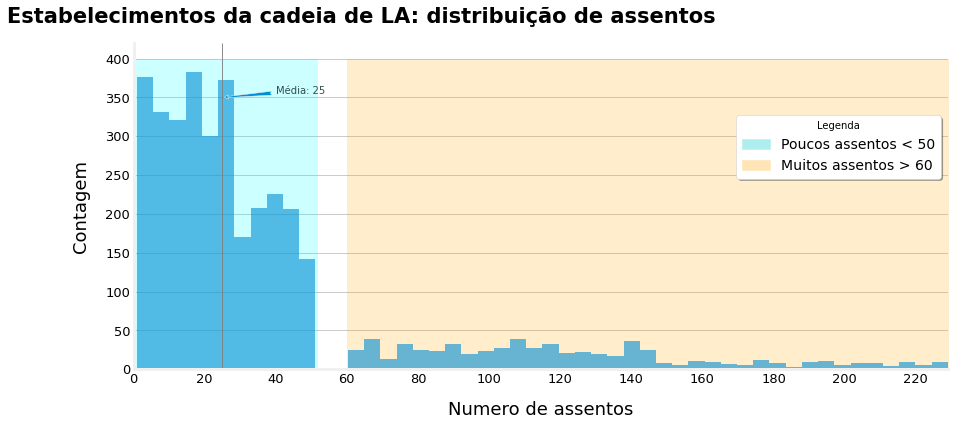

In [28]:
#plot
fig, ax = plt.subplots(figsize=(13,6), facecolor='white')
ax.set_facecolor("xkcd:white")
plt.hist(is_chain_seat_num, alpha=.6, bins=50)

#sombreamento e mediana
plt.fill_between(
    (0.1, 51.5), 400, 0,
    color='cyan', 
    alpha=0.2)
plt.fill_between(
    (60, is_chain_seat_num.max()), 400, 0,
    color='orange',  
    alpha=0.2)
plt.axvline(is_chain_seat_num.median(), color='gray', linewidth=.9)

#rótulos
plt.xlim(0, is_chain_seat_num.max())
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax.tick_params(labelsize=13)

azure_patch = mpatches.Patch(color='paleturquoise', label='Poucos assentos < 50')
orange_patch = mpatches.Patch(color='moccasin', label='Muitos assentos > 60')
plt.legend(handles=[azure_patch, orange_patch],
           loc='upper right',
           title='Legenda',
           facecolor='white',
           fancybox=True,
           shadow=True,bbox_to_anchor=(0, 0, 1, .8),
           fontsize=14
          )

#anotar, e grade
plt.annotate("Média: " + str(int(is_chain_seat_num.median())),
             xy=(25, 350),
             xytext=(40, 355),
             color='darkslategray',
             arrowprops=dict(arrowstyle="fancy"))
sns.despine()
plt.grid(False, axis='x')

#labels
plt.title("Estabelecimentos da cadeia de LA: distribuição de assentos",
          fontsize=21,
          x=.28,
          pad=20,
          fontweight='bold')
plt.xlabel('Numero de assentos', labelpad=15, fontsize=18)
plt.ylabel('Contagem', labelpad=15, fontsize=18)

plt.show()

In [29]:
df[df['chain'] == True]['seat_cat'].value_counts(normalize=True)

few     0.825224
many    0.174776
Name: seat_cat, dtype: float64

Com uma mediana de 25 assentos, a proporção de estabelecimentos da rede dada a distribuição tende mais para número baixo  de assentos (1-50 assentos) - cerca de 82% dos estabelecimentos. 

Além disso, observe a cauda inclinada à direita e a participação muito baixa. Considerando a proporção e tonalidade para a categoria "muitos assentos", indica que a distribuição indica que os estabelecimentos da rede são **caracterizados por poucos estabelecimentos com muitos lugares.**

Ao se observar a distribuição das vagas, outro questionamento veio à mente: Qual tipo de estabelecimento, em relação ao total, apresenta a maior concentração de estabelecimentos com "muitas vagas". Em particular para os estabelecimentos da rede.

In [30]:
# estabelecimento da rede e categoria de assento
establishment_seat = df[df['chain'] == True][['object_type', 'seat_cat']]

Para o nosso gráfico, queremos transformar a categoria em valores numéricos para representar graficamente a proporção de cada tipo de estabelecimento de valor em franquia ou não franquia.

In [31]:
establishment_seat = pd.get_dummies(establishment_seat, columns=['seat_cat']).copy()

In [32]:
establishment_seat_pivot = establishment_seat.groupby('object_type').mean().sort_values('seat_cat_many')
establishment_seat_pivot

,seat_cat_few,seat_cat_many
object_type,,
Cafe,0.966165,0.033835
Bakery,0.950530,0.049470
Pizza,0.928571,0.071429
Fast Food,0.818182,0.181818
Restaurant,0.790323,0.209677
Bar,0.766234,0.233766



Um gráfico de barras empilhadas para observar nossos resultados.

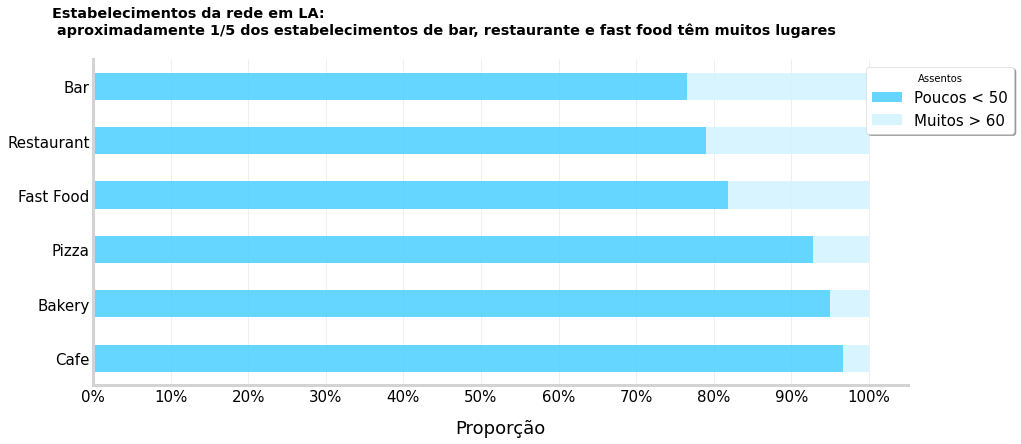

In [33]:
#plot
fig, ax = plt.subplots(figsize=(13,6), facecolor='white')
ax.set_facecolor("xkcd:white")
establishment_seat_pivot.plot.barh(stacked=True, ax=ax, alpha=.9, color=['#54d2ff','#d3f3ff'])


sns.despine()
plt.grid(False, axis='y')
plt.grid(axis='x', alpha=.3)
ax.spines['left'].set_color('lightgray')
ax.spines['bottom'].set_color('lightgray')
plt.legend(['Poucos < 50', 'Muitos > 60'],
           shadow=True,
           fancybox=True,
           title='Assentos',
           facecolor='white',
           fontsize=15,
           bbox_to_anchor=(0, 0, 1.14, 1))


ax.tick_params(labelsize=15)
ax.xaxis.set_major_locator(ticker.MultipleLocator(.10))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(1))

plt.ylabel('')
plt.xlabel('Proporção', labelpad=15, fontsize=18)
plt.title(
    "Estabelecimentos da rede em LA: \n aproximadamente 1/5 dos estabelecimentos de bar, restaurante e fast food têm muitos lugares",
    pad=25,
    fontweight='semibold',
    x=-.05,
    ha='left')

plt.show()

Assim, para os estabelecimentos da rede, a proporção de poucos assentos ainda para cada tipo de estabelecimento cai perto de 80%, senão, mais acima dessa proporção. 

O gráfico mostra que a proporção de "muitos assentos" para os tipos de estabelecimento, dos quais os restaurantes têm de longe a maior participação, é provavelmente a razão de reduzir a proporção geral de "poucos assentos" para 80%. 

Além disso, a porcentagem de poucos assentos para estabelecimento de restaurantes indica que há muitos restaurantes de pequenas redes em LA. Por fim, os estabelecimentos da rede de cafés parecem estar próximos de 100% na proporção do valor de "poucos lugares" (< 50).

Vejamos como esses números se parecem quando consideramos apenas a média e não as proporções.

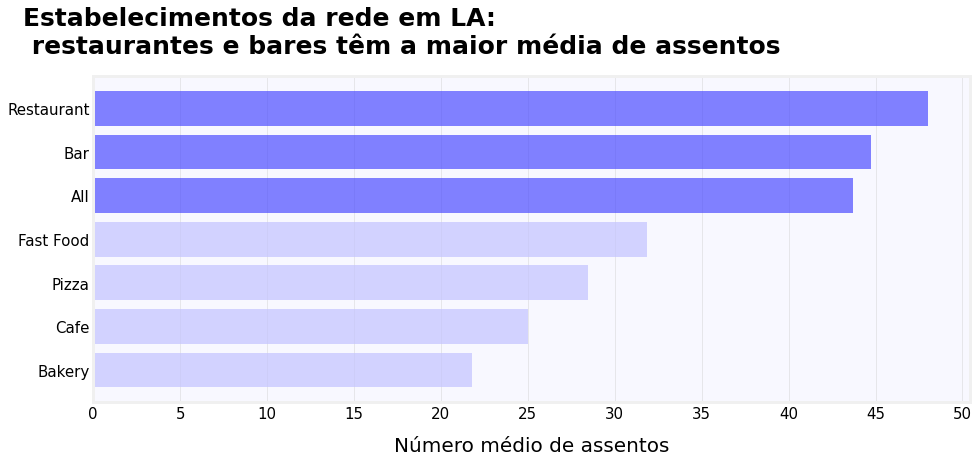

In [34]:
fig, ax = plt.subplots(figsize=(14,6), facecolor='white')
ax.set_facecolor("ghostwhite")
avg_seat_establishment = df.pivot_table(index='object_type',
                                        values='number',
                                        margins=True,
                                        aggfunc='mean')
color = [
    '#4d4dff' if int(i) > 40 else '#c3c3ff'
    for i in avg_seat_establishment.sort_values('number').values]

ax.barh(avg_seat_establishment.sort_values('number').index,
        avg_seat_establishment.sort_values('number')['number'],
        color=color,
        alpha=.7)

ax.tick_params(labelsize=15)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))


plt.grid(False, axis='y')
plt.grid(axis='x', alpha=.4)

plt.xlabel("Número médio de assentos", labelpad=15, fontsize=20)
plt.ylabel("", labelpad=10, fontsize=20)
plt.title(
    "Estabelecimentos da rede em LA: \n restaurantes e bares têm a maior média de assentos",
    x=-.08,
    pad=23,
    size=25,
    ha='left',
    fontweight='semibold')

plt.show()

In [35]:
avg_seat_establishment.sort_values('number').transpose()

object_type,Bakery,Cafe,Pizza,Fast Food,All,Bar,Restaurant
number,21.773852,25.0,28.459375,31.837711,43.695161,44.767123,48.042316


Quando consideramos a média agregada, observe como o número médio de assentos dos 4 tipos de estabelecimento cai mais de 10 assentos abaixo dela. Isso reforça ainda mais a noção de restaurante - incluindo bares - estabelecimentos que contêm uma parcela maior de "muitos lugares" em relação aos demais estabelecimentos. 

Nas distribuições de assentos, a maioria dos "muitos assentos" na distribuição pode ser atribuída a restaurantes ou bares. Vamos verificar rapidamente essa suposição.

In [36]:
df.query("object_type not in ['Restaurant','Bar']")['seat_cat'].value_counts(
    normalize=True) * 100

few     90.922053
many     9.077947
Name: seat_cat, dtype: float64

In [37]:
df.query("object_type in ['Restaurant','Bar']")['seat_cat'].value_counts(
    normalize=True) * 100

few     76.175964
many    23.824036
Name: seat_cat, dtype: float64

Aproximadamente 9% dos estabelecimentos com uma média relativamente baixa a contagem de assentos contém muitos assentos (> 61). Em comparação, aqueles com um alto avg. Contam, Restaurantes e Bares têm mais que o dobro dessa proporção - cerca de 23% dos estabelecimentos com muitas cadeiras (> 61). Isso faz sentido e será levado em consideração ao apresentar uma recomendação.

Após uma breve reflexão sobre esses números, vamos explorar os estabelecimentos de restaurantes com mais detalhes.

In [38]:
is_restaurant = df[df['object_type'] == 'Restaurant']

Começaremos a exploração traçando as 10 principais ruas com base no número de restaurantes. Usaremos a seguinte função para (1) deletar algumas strings irrelevantes para manter apenas o nome das ruas.

In [39]:
ending_Ofinterest = ['BLVD','ST','AVE','RD','DR','WAY']

In [40]:
extra=['WORLD WAY', 'W SUNSET BLVD', 'ECHO PARK AVE', 'NATIONAL BLVD', 'W 6TH ST STE', 'N CAHUENGA BLVD', 'S WESTERN AVE STE', 'WILSHIRE BLVD', 'S OXFORD AVE', 'MELROSE AVE', 'WALL ST STE', 'S SAN VICENTE BLVD', 'S INDIANA ST', 'N LA CIENEGA BLVD', 'W 3RD ST', 'S ALVARADO ST STE 111C', 'WALL ST', 'S WESTERN AVE', 'W SUNSET BLVD STE', 'GLENDALE BLVD', 'N FIGUEROA ST', 'W PICO BLVD', 'WORLD WAY LVL6 SP5', 'W OLYMPIC BLVD', 'S FLOWER ST STE B420', 'N VINE ST', 'W 5TH ST', 'S HOPE ST', 'HOLLYWOOD BLVD', 'KNOX AVE', 'AIRPORT BLVD', 'S FLOWER ST B-270', 'MARIACHI PLZ', 'ROSWELL ST', 'FRANKLIN AVE', 'S FLOWER ST', 'WORLD WAY 7C', 'W OLYMPIC BLVD STE', 'S GRAND AVE', 'S FLOWER ST B-15', 'WORLD WAY S4', 'E OLYMPIC BLVD', 'PASADENA AVE', 'WORLD WAY T81', 'WORLD WAY 5TH FLR', 'N GLENDALE BLVD', 'HOLLYWOOD BLVD -221', 'HOLLYWOOD BLVD STE', 'AVION DR', 'W MANCHESTER AVE LOS', 'E 11TH ST', 'CAHUENGA BLVD W', 'S FIGUEROA ST LBBY LOBBY', 'N FAIRFAX AVE STE', 'BEVERLY BLVD', 'W MANCHESTER AVE', 'COLORADO BLVD STE', 'W SUNSET BLVD A120', 'WESTWOOD PLZ', 'WESTWOOD PLZ A233B', 'W CHICK HEARN CT', 'W 6TH ST', 'WORLD WAY T38', 'LOS FELIZ BLVD STE', 'E 7TH ST', 'WORLD WAY T48', 'E CESAR E CHAVEZ AVE', 'PORTER ST', 'S NORMANDIE AVE', 'GAYLEY AVE', 'S SOTO ST', 'E 59TH ST', 'SUNSET BLVD', 'W SLAUSON AVE', 'WILSHIRE BLVD STE A3-A5', 'W 8TH ST', 'E 4TH ST', 'N LA BREA AVE', 'SOTO ST STE', 'S SEPULVEDA BLVD', 'WHITTIER BLVD', 'S VERMONT AVE', 'W 6TH ST 2B', 'W 87TH ST', 'DIVISION ST', 'S FIGUEROA ST STE 418A', 'S CENTRAL AVE', 'WABASH AVE', 'S BROADWAY', 'CRENSHAW BLVD', 'S NEW HAMPSHIRE AVE F1', 'S SERRANO AVE', 'S FIGUEROA ST 35TH', 'W 6TH ST A', 'LA PUERTA ST', 'W CENTURY BLVD', 'S LA BREA AVE', 'SANTEE ST', 'WILSHIRE BLVD STE I', 'LINCOLN BLVD', 'S IROLO ST STE', 'W 7TH ST', 'W TEMPLE ST']

In [41]:
def filters(extra):
    new= []
    y=extra.split(' ')
    for i in y:
        if i in ending_Ofinterest and i != 'STE': 
            new.append(i)
            return " ".join(new)
        elif i == 'STE':
            return " ".join(new)
        new.append(i)
    return " ".join(new)

In [42]:
def get_street(x):
    split_address = x.replace("#", "").replace("/", "").split()
    new = []
    for i in split_address:
        if i.isdigit():
            continue
        else:
            new.append(i)
    return ' '.join(new)

In [43]:
is_restaurant['street'] = is_restaurant['address'].apply(lambda x: get_street(x)).apply(lambda x: filters(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
print(is_restaurant['street'].value_counts().head(50))

WILSHIRE BLVD           309
W SUNSET BLVD           271
W PICO BLVD             257
S WESTERN AVE           219
W OLYMPIC BLVD          205
SANTA MONICA BLVD       204
HOLLYWOOD BLVD          191
W 3RD ST                185
W 6TH ST                178
S FIGUEROA ST           165
S VERMONT AVE           157
MELROSE AVE             123
BEVERLY BLVD            122
W 8TH ST                 94
WORLD WAY                87
E 1ST ST                 85
W 7TH ST                 74
WESTWOOD BLVD            74
N WESTERN AVE            69
VENICE BLVD              69
N FIGUEROA ST            64
COLORADO BLVD            64
S CENTRAL AVE            62
S ALAMEDA ST             58
SAN VICENTE BLVD         56
N VERMONT AVE            56
S BROADWAY               55
N BROADWAY               54
S SAN PEDRO ST           53
S MAIN ST                53
S GRAND AVE              51
WHITTIER BLVD            50
S SPRING ST              49
W WASHINGTON BLVD        49
SAWTELLE BLVD            47
S LA BREA AVE       


Agora vamos plotar.

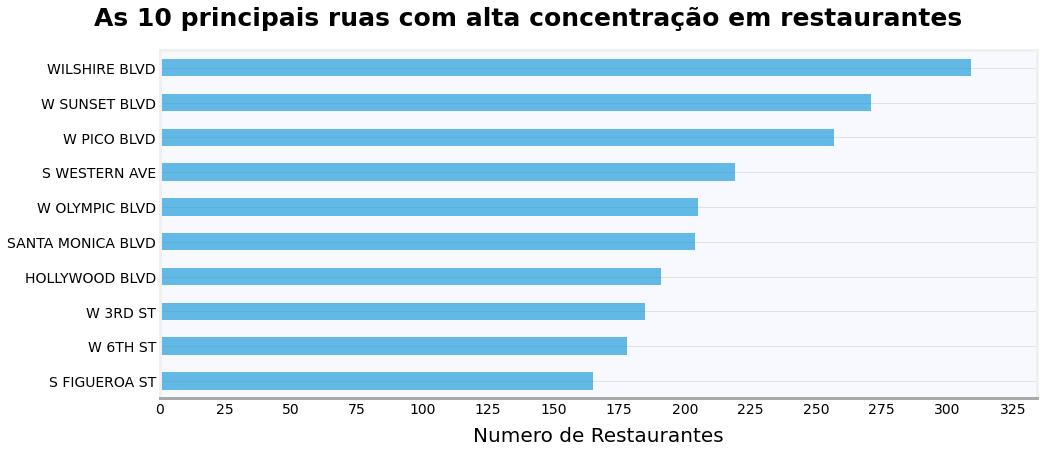

In [45]:
fig, ax = plt.subplots(facecolor='white')
ax.set_facecolor("ghostwhite")
is_restaurant['street'].value_counts().head(10).sort_values().plot.barh(figsize=(14,6.4),
                                                         rot=0,
                                                         alpha=.6)

plt.xlim(0,is_restaurant['street'].value_counts().max()+25)
ax.xaxis.set_major_locator(ticker.MultipleLocator(25))
ax.tick_params(axis='both', left=False, bottom=False, labelsize='14')

ax.spines['bottom'].set_color('darkgray')
plt.grid(False, axis='x')
plt.grid(axis='y',alpha=.5)
plt.ylabel('', labelpad=15, fontsize=20)
plt.xlabel('Numero de Restaurantes',labelpad=10,size=20)
plt.title("As 10 principais ruas com alta concentração em restaurantes",
          fontsize=25,
          x=.42,
          fontweight='semibold',
          pad=25)

plt.show()

Essas ruas contêm mais de 160 e até cerca de 325 estabelecimentos de restaurantes! Essas ruas podem ser do interesse da empresa se ela quiser entrar em um mercado competitivo, mas próspero.

E se a empresa quiser lançar em uma rua com apenas 1 restaurante. Vamos calcular rapidamente a % e o número de ruas que se enquadram nessa descrição

In [47]:
print('Todas as ruas:', len(is_restaurant['street'].value_counts()))
print(
    '1 restaurante (por rua):',
    len(is_restaurant['street'].value_counts()[
        is_restaurant['street'].value_counts() == 1]))
print(
    '1 Restaurante (%):',
    len(is_restaurant['street'].value_counts()[
        is_restaurant['street'].value_counts() == 1]) /
    len(is_restaurant['street'].value_counts()))

Todas as ruas: 723
1 restaurante (por rua): 348
1 Restaurante (%): 0.48132780082987553


De todas as 723 ruas que contêm um estabelecimento de restaurante, 348 ou ~ 48% delas contêm apenas um desse estabelecimento.

Considerando a contagem de 7k do total de restaurantes vista anteriormente, 52% das ruas com mais de 1 restaurante podem ser do interesse da empresa; vamos investigar essas ruas um pouco mais.

Primeiro, queremos segmentar as ruas em duas: poucos e muitos restaurantes. Vejamos a distribuição primeiro para ajudar a definir "muitos" restaurantes.

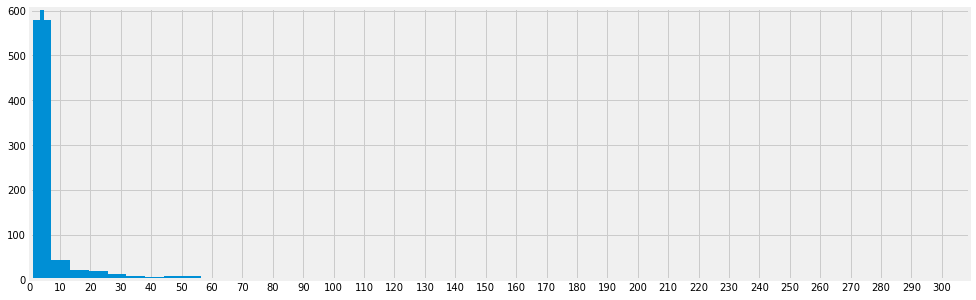

In [48]:
ax=is_restaurant['street'].value_counts().hist(bins=50,figsize=(15,5))
plt.axvline(is_restaurant['street'].value_counts().quantile(.68))
plt.xlim(0, is_restaurant['street'].value_counts().max())
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.show()

No gráfico, escolheremos > 10 restaurantes como nossa definição para "muitos" restaurantes para uma rua.

In [49]:
street_more_than_10_restaurants = is_restaurant['street'].value_counts()[
    is_restaurant['street'].value_counts() > 10].index

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


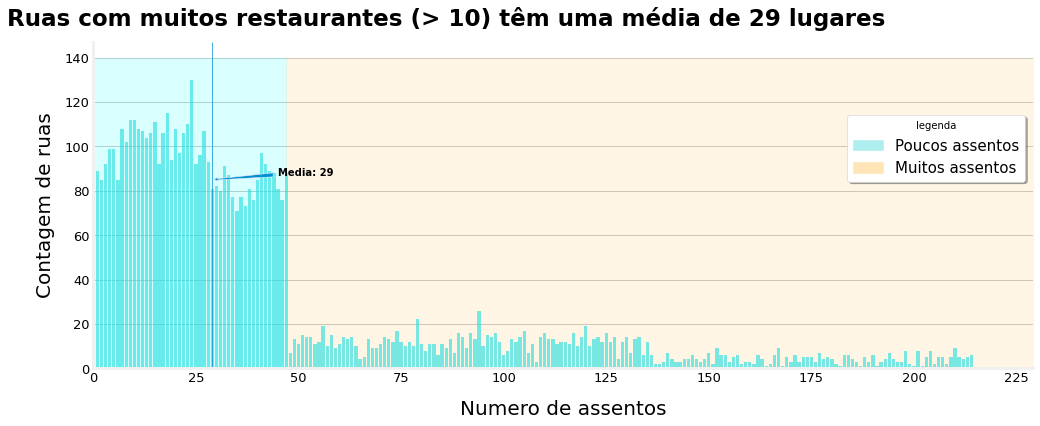

In [50]:
lots_restaurant_number_seats = is_restaurant.query("street in @street_more_than_10_restaurants")['number']

fig, ax = plt.subplots(figsize=(15,6), facecolor='white')
sns.countplot(lots_restaurant_number_seats, alpha=.6, color='cyan')
plt.axvline(lots_restaurant_number_seats.median(), alpha=.7, linewidth=1)
ax.set_facecolor("white")

freq = int(25)
xticks = ax.get_xticks()
ax.set_xticks(np.append(xticks[::25], lots_restaurant_number_seats.max() - 4))
ax.set_xticklabels(
    np.append(xticks[::25],
              lots_restaurant_number_seats.max() - 4))
plt.xlim(0, lots_restaurant_number_seats.max())
ax.tick_params(labelsize=13)

plt.annotate("Media: " + str(int(lots_restaurant_number_seats.median())),
             xy=(lots_restaurant_number_seats.median(), 85),
             xytext=(45, 87),fontweight='bold',
             arrowprops=dict(arrowstyle="fancy"))
sns.despine()

plt.fill_between(
    (0.1, 47), 140,0,
    color='cyan',  
    alpha=0.15)
plt.fill_between(
    (47.01, lots_restaurant_number_seats.max()),140,0,
    color='orange',  
    alpha=0.1)

azure_patch = mpatches.Patch(color='paleturquoise', label='Poucos assentos')
orange_patch = mpatches.Patch(color='moccasin', label='Muitos assentos')
plt.legend(handles=[azure_patch, orange_patch],
           loc='upper right',
           title='legenda',
           facecolor='white',
           fancybox=True,bbox_to_anchor=(0, 0, 1, .80),
           shadow=True,
           fontsize=15)

plt.xlabel("Numero de assentos", labelpad=15, fontsize=20)
plt.ylabel("Contagem de ruas", labelpad=10, fontsize=20)
plt.title("Ruas com muitos restaurantes (> 10) têm uma média de 29 lugares \n  ",
          fontsize=23,
          x=.38,
          y=.95,
          fontweight='semibold')
plt.show()


Aqui podemos observar o mesmo padrão observado na distribuição geral do número de assentos.

Vamos dar uma olhada em como esse número ficará entre os estabelecimentos de rede de franquias e não para ruas com muitos restaurantes.

In [51]:
is_over10restaurant_chain = is_restaurant.query(
    "street in @street_more_than_10_restaurants and chain==True")
is_over10restaurant_non_chain = is_restaurant.query(
    "street in @street_more_than_10_restaurants and chain==False")

In [52]:
chain_restaraunt_many_street = is_over10restaurant_chain['number']
non_chain_restaraunt_many_street = is_over10restaurant_non_chain['number']

In [53]:
chain_restaraunt_many_street.max(), non_chain_restaraunt_many_street.max()

(229, 229)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


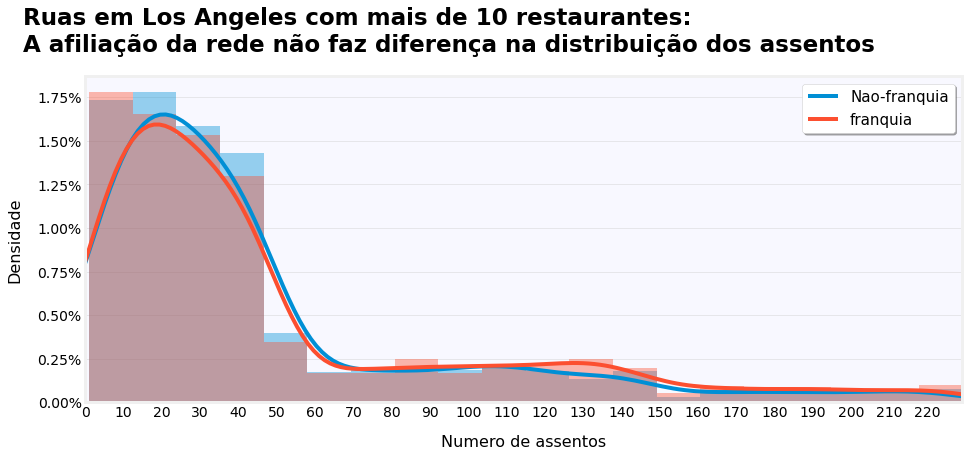

In [54]:
fig, ax = plt.subplots(figsize=(14,6), facecolor='white')
ax.set_facecolor("ghostwhite")
sns.distplot(chain_restaraunt_many_street, bins=20)
sns.distplot(non_chain_restaraunt_many_street, bins=20)

def mjrFormatter(x, pos):
    return "{:.2f}%".format(x * 100)
plt.grid(False, axis='x')
plt.grid(axis='y',alpha=.4)
plt.xlim(0, chain_restaraunt_many_street.max())
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.tick_params(labelsize=14)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(mjrFormatter))

plt.legend(['Nao-franquia', 'franquia'], fancybox=True, shadow=True, fontsize=15,facecolor='white')

plt.xlabel('Numero de assentos', labelpad=15, fontsize=16)
plt.ylabel('Densidade', labelpad=15, fontsize=16)
plt.title(
    " Ruas em Los Angeles com mais de 10 restaurantes: \n A afiliação da rede não faz diferença na distribuição dos assentos",
    fontsize=23,
    x=-.08,
    pad=25,
    ha='left',
    fontweight='semibold')

plt.show()

A distribuição de assentos pode ser dividida em dois grupos (muitos e poucos) e não difere entre franquias e estabelecimentos de restaurantes fora da franquia

# Resumo do Projeto
---
#Estabelecimentos de LA:

* Contagem total de restaurantes: 9.651
* 62% não são franquias e 38% são.
* Estabelecimentos da rede - número de assentos em duas categorias:
  1. Poucos assentos (< 50) 
  2. e muitos assentos (> 61)

#Cafeteria:

* Aproximadamente 4,5% da participação de mercado
* É mais provável que seja uma rede (61,1%)
  1. De acordo com pesquisas de mercado, essa tendência deve continuar aumentando
* Estabelecimentos de rede menor parcela de muitos assentos (> 61) em relação a outro tipo de estabelecimento
  1. os caracteriza como pequenos locais
  2. Número médio de assentos = 25

# Restaurante:

* Grande parcela de estabelecimentos em LA : os restaurantes representam cerca de 75% dos estabelecimentos em LA - tornam-se relativamente mais fáceis de competir e prosperar devido ao serviço que irão fornecer
* Mais propensos a serem não correntes (68,4%)
* Correntes :
    1. 1/5 ou 20% têm muitos assentos (> 60)
    2. Têm em média 48 lugares
    3. 68% das ruas contêm 1 restaurante, enquanto 32% contêm mais de 1; As 10 principais ruas contêm entre 110 e 230 restaurantes.
* Ruas com mais de 10 restaurantes
    1. Ter uma média de 32 assentos
    2. A distribuição dos assentos pode ser dividida em dois grupos e não difere entre os estabelecimentos de rede e não rede.

# Conclusão
---
Ao pensar em se estabelecer em LA, dados: (1) estabelecimento escolhido (pequeno Café), (2) a novidade do serviço prestado (garçons robô), (3) as atuais condições de mercado, (4) custo do projeto, e (5) objetivo de longo prazo para manter um estabelecimento de sucesso, a seguinte conclusão é dada:

* A empresa deve pivotar no sentido de estabelecer um restaurante, pois há menos grandes players (cadeias) nesse mercado em relação aos cafés; 

* Os pequenos cafés estão sendo superados pelas franquias de cafés.

* Grande parte de estabelecimentos na América Latina, especialmente considerando seu alto percentual de estabelecimentos não pertencentes à rede, torna relativamente mais fácil competir e prosperar devido ao serviço que irá fornecer.

* A empresa deve pensar em começar não franqueada com 48 lugares e dependendo da sua estratégia, estabelecer-se em uma rua com muitos restaurantes e / ou um restaurante. Ela pode então crescer agressivamente e estabelecer uma própria franquia a partir de então, dada a novidade do serviço prestado.